In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

In [3]:
marketing = pd.read_csv("/content/marketing_data[1].csv")
marketing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


•	Once data is imported, investigate variables like Dt_Customer and Income, etc., and check if they are imported correctly.

In [ ]:
marketing.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

In [4]:
# Remove spaces before and after column names and row values
#first i have to convert the data to str
marketing = marketing.astype(str)

marketing = marketing.rename(columns=lambda x: x.strip())
marketing = marketing.applymap(lambda x: x.strip())

In [5]:
#changing the date type
marketing['Education'] = marketing['Education'].astype('category')
marketing['Marital_Status'] = marketing['Marital_Status'].astype('category')
#Income contain str char so i will remove them so i can use the column as float
marketing['Income'] = marketing['Income'].str.replace('$', '').str.replace(',', '').astype(float)
marketing['Dt_Customer'] = pd.to_datetime(marketing['Dt_Customer'])
marketing['Country'] = marketing['Country'].astype('category')

# Convert remaining columns to int64 data type
remaining_columns = marketing.select_dtypes(exclude=['category', 'datetime64', 'float']).columns
marketing[remaining_columns] = marketing[remaining_columns].astype('int64')

<ipython-input-5-45635283d563>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  marketing['Income'] = marketing['Income'].str.replace('$', '').str.replace(',', '').astype(float)


In [ ]:
marketing.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
marketing.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [ ]:
marketing.dtypes

ID                              int64
Year_Birth                      int64
Education                    category
Marital_Status               category
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
Complain    

•	Income values for a few customers are missing. Perform missing value imputation. Assume that the customers with similar education and marital status make the same yearly income, on average. You may have to clean the data before performing this. For data cleaning, look into the categories of education and marital status.

In [6]:
# Clean the data:
# 1- count the number of missing values in each column:
marketing.isnull().sum()

# 2- fill in the missing values from  column Income:

# Calculate the average income for each group of customers with similar education and marital status
grouped_df = marketing.groupby(['Education', 'Marital_Status'])['Income'].mean()

# Iterate over the rows with missing 'Income' values
for index, row in marketing[marketing['Income'].isnull()].iterrows():
    education = row['Education']
    marital_status = row['Marital_Status']

    # Check if there is a corresponding group average for the education and marital status
    if (education, marital_status) in grouped_df.index:
        average_income = grouped_df.loc[(education, marital_status)]

        # Fill in the missing 'Income' value with the group average
        marketing.at[index, 'Income'] = average_income

In [ ]:
marketing.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

•	Create variables to populate the total number of children, age, and total spending.

In [ ]:
# Create a variable for the total number of children
marketing['TotalNumChildren'] = marketing[['Kidhome', 'Teenhome']].sum(axis=1)

# Create a variable for age based on the current year
current_year = 2023  # Update with the current year
marketing['Age'] = current_year - marketing['Year_Birth']

# Create a variable for the total spending
spendings = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                    'MntSweetProducts', 'MntGoldProds']
marketing['TotalSpending'] = marketing[spendings].sum(axis=1)

# Verify the updated DataFrame
print(marketing[['TotalNumChildren', 'Age', 'TotalSpending']])

      TotalNumChildren  Age  TotalSpending
0                    0   53           1190
1                    0   62            577
2                    1   65            251
3                    2   56             11
4                    1   34             91
...                ...  ...            ...
2235                 1   47            689
2236                 1   46             55
2237                 1   47            309
2238                 0   45           1383
2239                 2   54           1078

[2240 rows x 3 columns]


•	Create box plots and histograms to understand the distributions and outliers. Perform outlier treatment.

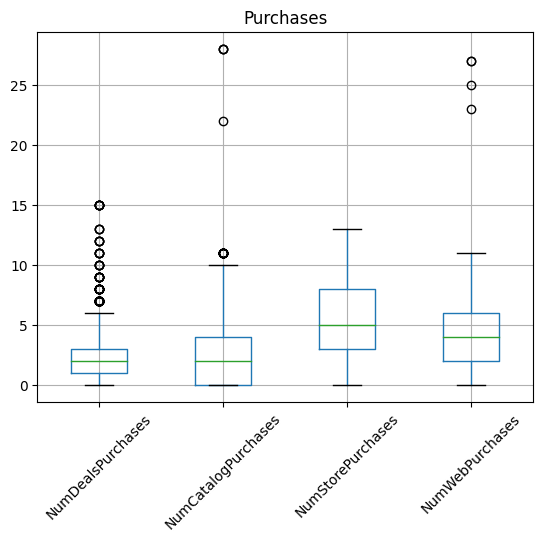

In [ ]:
# Create a subset DataFrame with the desired columns
subset = marketing[['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']]

# Create the boxplot
boxplot = subset.boxplot()

# Add a title to the boxplot
plt.title('Purchases')

# Rotate the column names on the x-axis
plt.xticks(rotation= 45)

# Display the boxplot
plt.show()

<Figure size 1200x6000 with 0 Axes>

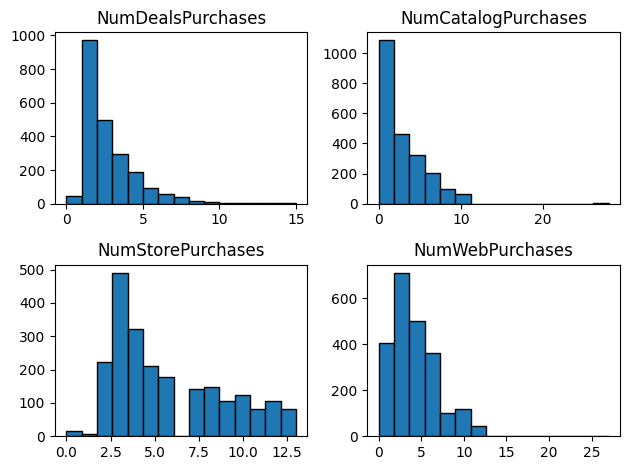

In [ ]:
# Create a subset DataFrame with the desired columns
subset = ['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']

plt.figure(figsize=(12, 60))
marketing[subset].hist(bins=15, grid=False, edgecolor='black')
plt.tight_layout()
plt.show()

•	Use ordinal encoding and one hot encoding according to different types of categorical variables.

In [ ]:
# Perform one hot encoding on the nominal categorical variables
# the hot encoding is used to check the persentens for categorical variables to be used for machine learning
one_hot_encoded = pd.get_dummies(marketing[['Education', 'Marital_Status']])
one_hot_encoded

,Education,Marital_Status
0,2.0,4.0
1,2.0,1.0
2,2.0,2.0
3,2.0,3.0
4,2.0,1.0
...,...,...
2235,NaN,4.0
2236,3.0,2.0
2237,2.0,4.0
2238,2.0,2.0


In [ ]:
# ordinal encoding on categorical variables, variables that have an inherent order or hierarchy
# which will be the Education, Marital_Status, and Country columns

ordinal_mapping = { 'Education': { 'Basic': 1, 'Graduation': 2, '2n Cycle': 3, 'Master': 4, 'phD': 5},
                    'Marital_Status': { 'Single': 1, 'Married': 2, 'Together': 3, 'Divorced': 4, 'Alone': 5, 'YOLO': 6}
                    }

# Apply ordinal encoding to the categorical variables
marketing['Education'] = marketing['Education'].map(ordinal_mapping['Education'])
marketing['Marital_Status'] = marketing['Marital_Status'].map(ordinal_mapping['Marital_Status'])

encoded_columns = ['Education', 'Marital_Status']
print(marketing[encoded_columns])

      Education  Marital_Status
0           2.0             4.0
1           2.0             1.0
2           2.0             2.0
3           2.0             3.0
4           2.0             1.0
...         ...             ...
2235        NaN             4.0
2236        3.0             2.0
2237        2.0             4.0
2238        2.0             2.0
2239        NaN             2.0

[2240 rows x 2 columns]


•	Create a heatmap to showcase the correlation between different pairs of variables.

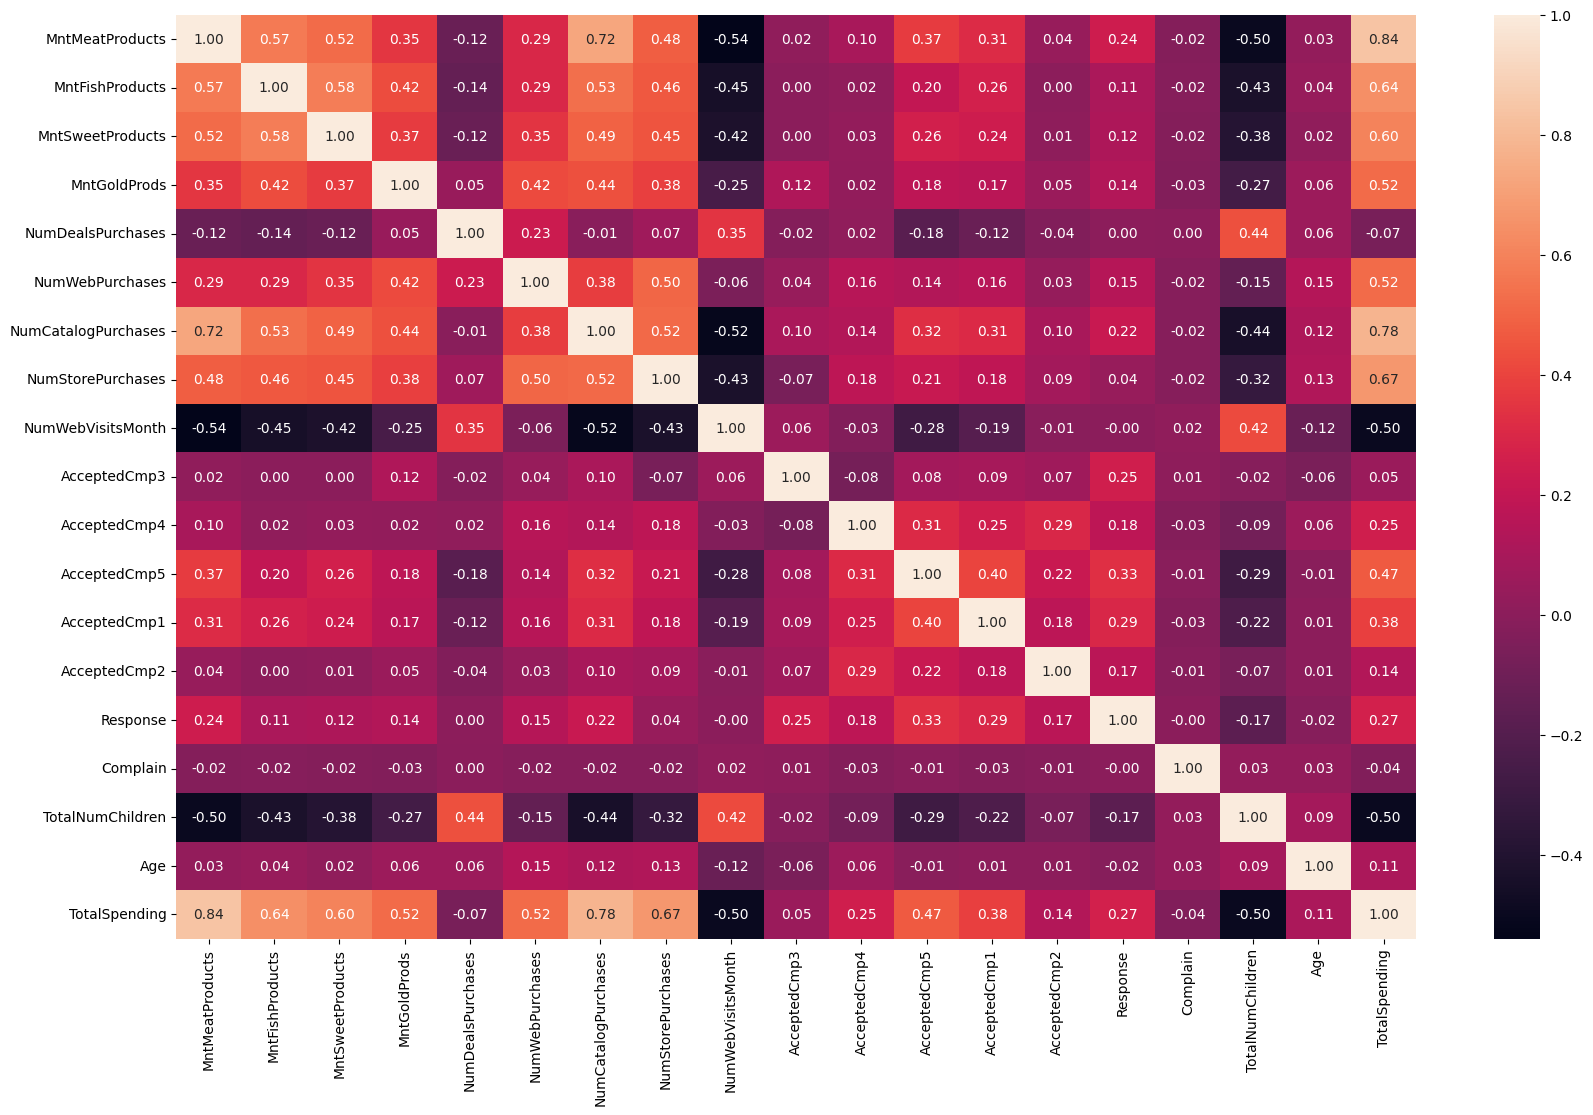

In [ ]:
'''
# Select the specific columns for correlation analysis
selected_columns = ['MntMeatProducts', 'NumStorePurchases', 'NumStorePurchases', 'NumWebPurchases']

# Extract the selected columns from the DataFrame
selected_data = marketing[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
'''

numerical_columns = ['MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                     'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                     'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
                     'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain',
                     'TotalNumChildren', 'Age', 'TotalSpending']

df_numerical2 = marketing[numerical_columns]

corr = df_numerical2.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True,fmt='.2f')
plt.show()

•	Test the following hypotheses:

o	Older people are not as tech-savvy and probably prefer shopping in-store.

In [ ]:
'''
#import plotly.express as px

# Create a variable for age based on the current year
current_year = 2023  # Update with the current year
marketing['Age'] = current_year - marketing['Year_Birth']

age_sales = marketing.groupby('Age')['NumStorePurchases'].sum()

# Reset the index of time_group_sales DataFrame
age_sales = age_sales.reset_index()

# Create an interactive line plot using Plotly
fig = px.line(age_sales, x='Age', y='NumStorePurchases', title='Store Purchases')
fig.update_xaxes(title='Age')
fig.update_yaxes(title='Purchases')
fig.show()
'''

In [ ]:
'''
#import plotly.express as px

# Create a variable for age based on the current year
current_year = 2023  # Update with the current year
marketing['Age'] = current_year - marketing['Year_Birth']

age_sales = marketing.groupby('Age')['NumWebPurchases'].sum()

# Reset the index of time_group_sales DataFrame
age_sales = age_sales.reset_index()

# Create an interactive line plot using Plotly
fig = px.line(age_sales, x='Age', y='NumWebPurchases', title='Web Purchases')
fig.update_xaxes(title='Age')
fig.update_yaxes(title='Purchases')
fig.show()
'''

In [ ]:
# Create a variable for age based on the current year
current_year = 2023  # Update with the current year
marketing['Age'] = current_year - marketing['Year_Birth']

# Calculate the total store purchases by age
age_store_purchases = marketing.groupby('Age')['NumStorePurchases'].sum().reset_index()

# Calculate the total web purchases by age
age_web_purchases = marketing.groupby('Age')['NumWebPurchases'].sum().reset_index()

# Create subplots with a 1x2 grid layout
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['Store Purchases', 'Web Purchases'])

# Add the store purchases line plot
fig.add_trace(go.Scatter(x=age_store_purchases['Age'], y=age_store_purchases['NumStorePurchases'], mode='lines', name='Store Purchases'), row=1, col=1)

# Add the web purchases line plot
fig.add_trace(go.Scatter(x=age_web_purchases['Age'], y=age_web_purchases['NumWebPurchases'], mode='lines', name='Web Purchases'), row=1, col=2)

# Update layout and display the dashboard
fig.update_layout(height=500, title='Store and Web Purchases Analysis')
fig.update_xaxes(title_text='Age', row=1, col=1)
fig.update_yaxes(title_text='Total Store Purchases', row=1, col=1)
fig.update_xaxes(title_text='Age', row=1, col=2)
fig.update_yaxes(title_text='Total Web Purchases', row=1, col=2)
fig.show()

o	Customers with kids probably have less time to visit a store and would prefer to shop online.

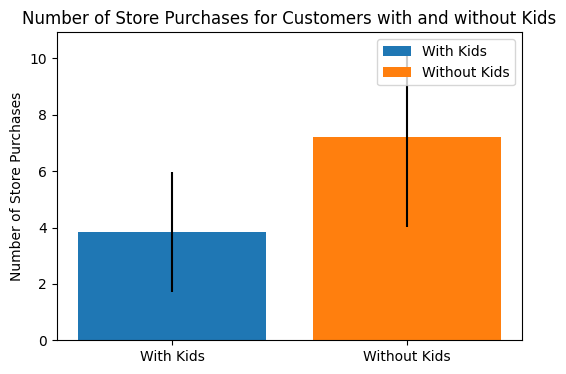

In [ ]:
#Separate the data into two groups based on the presence of kids
with_kids = marketing[marketing['Kidhome'] > 0]['NumStorePurchases']
without_kids = marketing[marketing['Kidhome'] == 0]['NumStorePurchases']

#Plot the data
plt.figure(figsize=(6, 4))
plt.bar('With Kids', with_kids.mean(), yerr=with_kids.std(), label='With Kids')
plt.bar('Without Kids', without_kids.mean(), yerr=without_kids.std(), label='Without Kids')
plt.ylabel('Number of Store Purchases')
plt.title('Number of Store Purchases for Customers with and without Kids')
plt.legend()
plt.show()

o	Other distribution channels may cannibalize sales at the store.

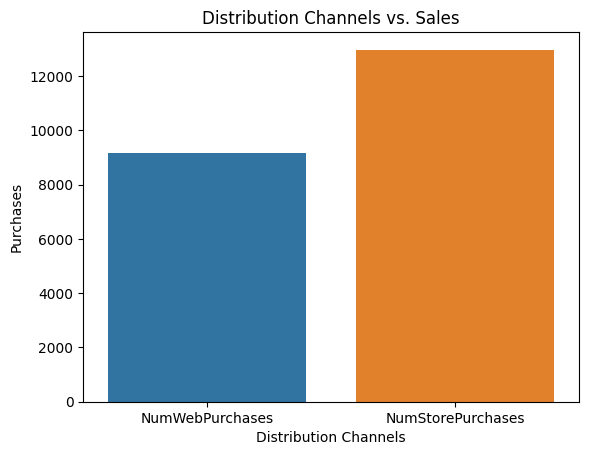

In [8]:
'''
Cannibalization refers to a situation where sales from one distribution channel
negatively impact or reduce sales from another channel.
'''

distribution_channels = ['NumWebPurchases', 'NumStorePurchases']
total_Purchase = [
    marketing['NumWebPurchases'].sum(),
    marketing['NumStorePurchases'].sum(),
]


sns.barplot(x=distribution_channels, y=total_Purchase)

plt.title('Distribution Channels vs. Sales')
plt.xlabel('Distribution Channels')
plt.ylabel('Purchases')
plt.show()

o	Does the US fare significantly better than the rest of the world in terms of total purchases?

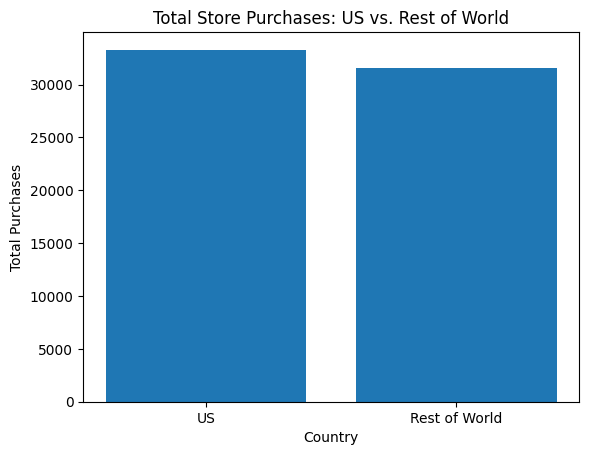

In [25]:
us_total_purchases = marketing[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sum()

US = marketing[marketing['Country'] == 'US']

# Filter the data for the rest of the world (excluding the US) and calculate the total purchases
rest_of_world_data = marketing[marketing['Country'] != 'US']
rest_of_world_total_purchases = rest_of_world_data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sum()

plt.bar(['US', 'Rest of World'], [us_total_purchases, rest_of_world_total_purchases])

plt.title('Total Store Purchases: US vs. Rest of World')
plt.xlabel('Country')
plt.ylabel('Total Purchases')
plt.show()

o	Which products are performing the best, and which are performing the least in terms of revenue?

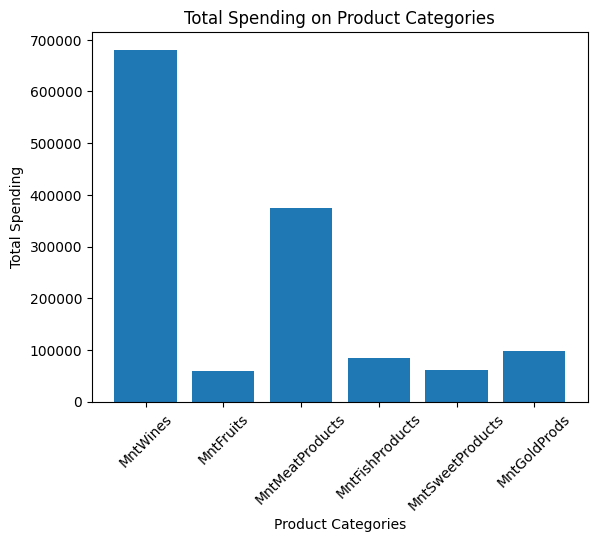

In [27]:
'''
Based on the dataframe columns there are no column that represents the total revenue so i will use the
total amount of each product
'''

product_categories = {
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat Products',
    'MntFishProducts': 'Fish Products',
    'MntSweetProducts': 'Sweet Products',
    'MntGoldProds': 'Gold Products'
}

# Calculate the amount for each product category
product_amount = {}
for col, category in product_categories.items():
    product_amount[category] = marketing[col].sum()

# Extract the product categories and spending values
categories = list(product_categories.keys())
spending = list(product_amount.values())

plt.bar(categories, spending)

plt.title('Total Spending on Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

o	Is there any pattern between the age of customers and the last campaign acceptance rate?

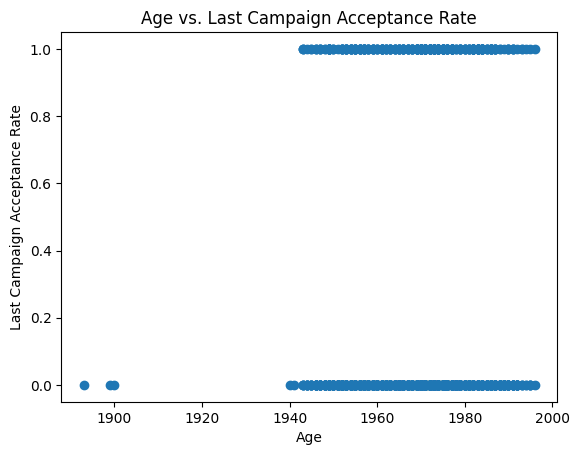

<Figure size 1500x1000 with 0 Axes>

In [32]:
'''
as what is written the dictionary the "Response"
is the 1 if the customer accepted the offer in the last campaign, 0 otherwise
so Response is the last campaign
'''

plt.scatter(marketing['Year_Birth'], marketing['Response'])

plt.title('Age vs. Last Campaign Acceptance Rate')
plt.xlabel('Age')
plt.ylabel('Last Campaign Acceptance Rate')
fig = plt.figure(figsize=(15, 10))
plt.show()

o	Which Country has the greatest number of customers who accepted the last campaign?

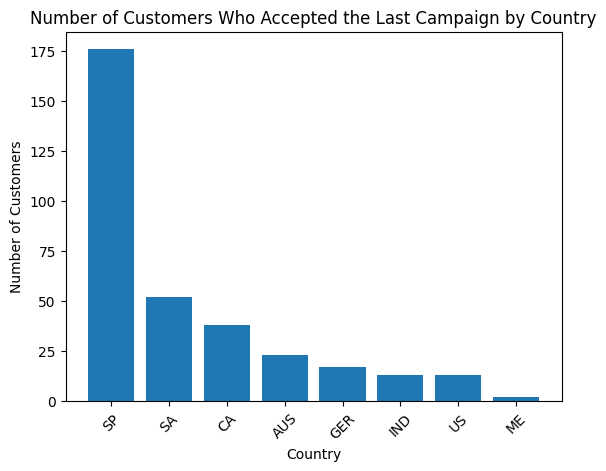

In [35]:
country_accepted_counts = marketing[marketing['Response'] == 1]['Country'].value_counts()

# Plot the number of customers who accepted the last campaign for each country
plt.bar(country_accepted_counts.index, country_accepted_counts.values)

# Set the plot title and axes labels
plt.title('Number of Customers Who Accepted the Last Campaign by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')

plt.xticks(rotation=45)
plt.show()

o	Do you see any pattern in the no. of children at home and total spend?

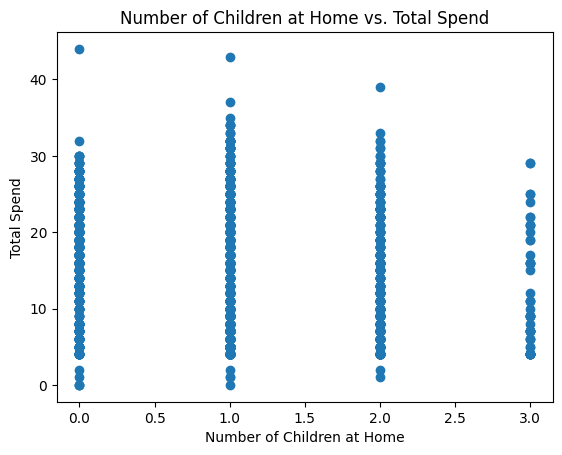

In [42]:
num_children = marketing['Kidhome'] + marketing['Teenhome']
total_spend = marketing['NumDealsPurchases'] + marketing['NumWebPurchases'] + marketing['NumCatalogPurchases'] + marketing['NumStorePurchases']

plt.scatter(num_children, total_spend)
plt.title('Number of Children at Home vs. Total Spend')
plt.xlabel('Number of Children at Home')
plt.ylabel('Total Spend')
plt.show()

o	Education background of the customers who complained in the last 2 years.

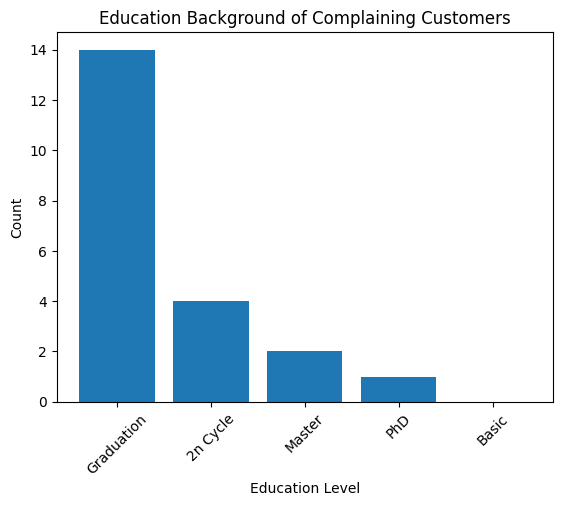

In [43]:
complained_customers = marketing[marketing['Complain'] == 1]

# Count the occurrences of each education level among the complaining customers
education_counts = complained_customers['Education'].value_counts()

plt.bar(education_counts.index, education_counts.values)

plt.title('Education Background of Complaining Customers')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()